<a href="https://colab.research.google.com/github/rpark3/ECON3916-Statistical-Machine-Learning/blob/main/Assignment%201/Econ_3916_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Manual Data Construction
student_basket = [
    {'Item': 'Tuition', 'Price_2016': 45000, 'Price_2024': 58000},
    {'Item': 'Rent (1 Bed)', 'Price_2016': 1200, 'Price_2024': 1800},
    {'Item': 'Burrito', 'Price_2016': 7.50, 'Price_2024': 11.50},
    {'Item': 'Netflix', 'Price_2016': 11.99, 'Price_2024': 15.49}
]

In [4]:
# Define the "Machine" (Function)
def calculate_inflation(base, current):
    return ((current - base) / base) * 100

# Run the Loop
for item in student_basket:
    rate = calculate_inflation(item['Price_2016'], item['Price_2024'])
    print(f"{item['Item']}: {rate:.2f}% Inflation")

Tuition: 28.89% Inflation
Rent (1 Bed): 50.00% Inflation
Burrito: 53.33% Inflation
Netflix: 29.19% Inflation


In [5]:
!pip install fredapi
from fredapi import Fred
fred = Fred(api_key='7012cb0f0a29fcbffe88ef60c40de610')

# Fetch Series
official_cpi = fred.get_series('CPIAUCSL')
tuition = fred.get_series('CUSR0000SEEB')
rent = fred.get_series('CUSR0000SEHA')
# ... fetch remaining series
burrito = fred.get_series('CUSR0000SEFV')
netflix = fred.get_series('CUSR0000SERA02')


In [6]:
import pandas as pd
df = pd.DataFrame({
    'Official_CPI': official_cpi,
    'Tuition': tuition,
    'Rent': rent,
    'Burrito': burrito,
    'Netflix': netflix,
    })
df = df.dropna()

Value_start = df.loc['2016-01-01']

Value_Index = (df / Value_start) * 100

Value_Index = Value_Index.loc["2016":]

print(Value_Index.head())
print(Value_Index.tail())

            Official_CPI     Tuition        Rent     Burrito     Netflix
2016-01-01    100.000000  100.000000  100.000000  100.000000  100.000000
2016-02-01     99.867032  100.241572  100.314364  100.138869  100.723912
2016-03-01    100.180095  100.470288  100.607131  100.355827  101.450163
2016-04-01    100.563850  100.692146  100.924580  100.599712  101.878663
2016-05-01    100.801592  100.929861  101.258485  100.813978  102.214306
            Official_CPI     Tuition        Rent     Burrito     Netflix
2025-07-01    135.547776  127.653119  149.520740  147.642311  139.048225
2025-08-01    136.066181  127.901262  149.969832  148.065841  138.608498
2025-09-01    136.488647  128.186549  150.264655  148.274337  138.918178
2025-11-01    136.767627  128.857838  150.454234  148.947907  140.157366
2025-12-01    137.187989  129.057982  150.851560  149.981535  141.700855


In [7]:
Value_Index

,Official_CPI,Tuition,Rent,Burrito,Netflix
2016-01-01,100.000000,100.000000,100.000000,100.000000,100.000000
2016-02-01,99.867032,100.241572,100.314364,100.138869,100.723912
2016-03-01,100.180095,100.470288,100.607131,100.355827,101.450163
2016-04-01,100.563850,100.692146,100.924580,100.599712,101.878663
2016-05-01,100.801592,100.929861,101.258485,100.813978,102.214306
...,...,...,...,...,...
2025-07-01,135.547776,127.653119,149.520740,147.642311,139.048225
2025-08-01,136.066181,127.901262,149.969832,148.065841,138.608498
2025-09-01,136.488647,128.186549,150.264655,148.274337,138.918178
2025-11-01,136.767627,128.857838,150.454234,148.947907,140.157366


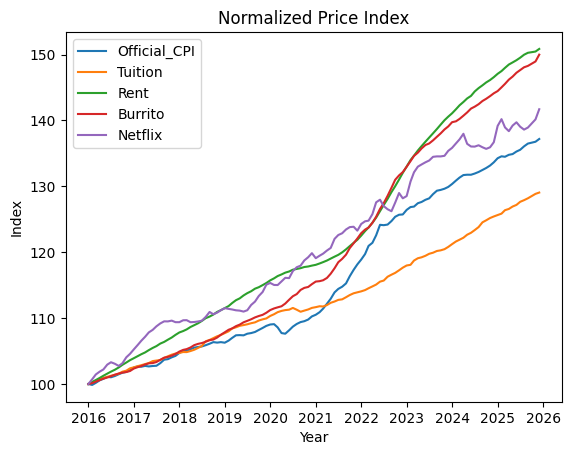

In [8]:
#Normalized series graph
import matplotlib.pyplot as plt

for column in Value_Index.columns:
    plt.plot(Value_Index.index, Value_Index[column], label=column)

plt.xlabel("Year")
plt.ylabel("Index")
plt.title("Normalized Price Index")
plt.legend()
plt.show()

In [9]:
#weight dictionary
weight = {
    "Tuition": 0.4,
    "Rent": 0.3,
    "Burrito": 0.2,
    "Netflix": 0.1,
}

In [10]:
#calculating student spi
Value_Index ["Student_SPI"] = (
    Value_Index["Tuition"] * weight["Tuition"] +
    Value_Index["Rent"] * weight["Rent"] +
    Value_Index["Burrito"] * weight["Burrito"] +
    Value_Index["Netflix"] * weight["Netflix"]
)

In [11]:
Value_Index

,Official_CPI,Tuition,Rent,Burrito,Netflix,Student_SPI
2016-01-01,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2016-02-01,99.867032,100.241572,100.314364,100.138869,100.723912,100.291103
2016-03-01,100.180095,100.470288,100.607131,100.355827,101.450163,100.586436
2016-04-01,100.563850,100.692146,100.924580,100.599712,101.878663,100.862041
2016-05-01,100.801592,100.929861,101.258485,100.813978,102.214306,101.133716
...,...,...,...,...,...,...
2025-07-01,135.547776,127.653119,149.520740,147.642311,139.048225,139.350754
2025-08-01,136.066181,127.901262,149.969832,148.065841,138.608498,139.625473
2025-09-01,136.488647,128.186549,150.264655,148.274337,138.918178,139.900702
2025-11-01,136.767627,128.857838,150.454234,148.947907,140.157366,140.484723


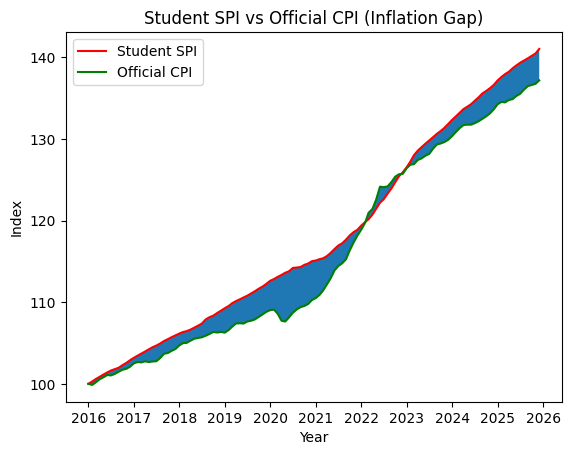

In [12]:
#Weighted student spi chart
plt.plot(Value_Index.index, Value_Index["Student_SPI"], label="Student SPI", color="red")
plt.plot(Value_Index.index, Value_Index["Official_CPI"], label="Official CPI", color="green")

plt.fill_between(Value_Index.index, Value_Index["Student_SPI"], Value_Index["Official_CPI"])

plt.xlabel("Year")
plt.ylabel("Index")
plt.title("Student SPI vs Official CPI (Inflation Gap)")
plt.legend()
plt.show()

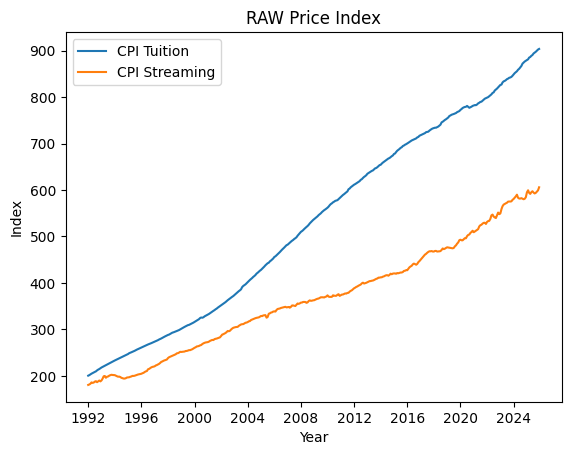

In [13]:
#"Bad Chart"
plt.plot(df.index, df['Tuition'], label="CPI Tuition")
plt.plot(df.index, df['Netflix'], label="CPI Streaming")
plt.xlabel("Year")
plt.ylabel("Index")
plt.title("RAW Price Index")
plt.legend()
plt.show()

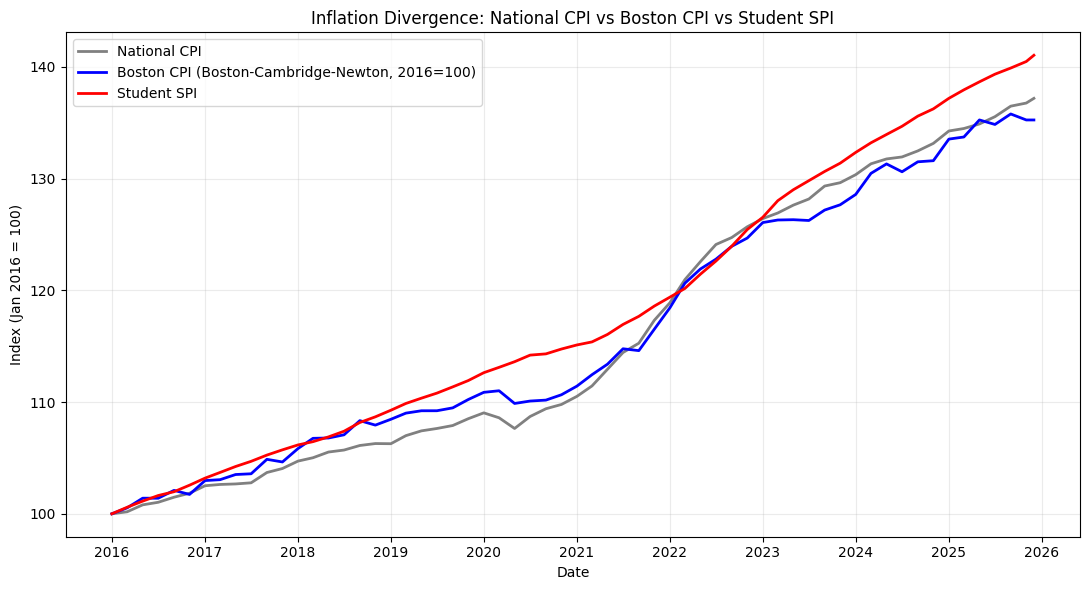

In [14]:
#Boston vs USA vs Student
import os
import pandas as pd
import matplotlib.pyplot as plt
from fredapi import Fred

# --- Assumes Value_Index already exists with:
# Value_Index.index = DatetimeIndex
# Value_Index['Official_CPI'] and Value_Index['Student_SPI'] both normalized to 100

# 1) Connect to FRED
# Option A: set env var in your terminal: export FRED_API_KEY="..."
fred = Fred(api_key=("7012cb0f0a29fcbffe88ef60c40de610"))  # or Fred(api_key="YOUR_KEY_HERE")

BOSTON_SERIES_ID = "CUURA103SA0"  # CPI-U: All Items, Boston-Cambridge-Newton, MA-NH

# 2) Pull Boston CPI (monthly)
boston = fred.get_series(BOSTON_SERIES_ID)
boston.index = pd.to_datetime(boston.index)
boston = boston.sort_index()

# 3) Re-index Boston so 2016-01-01 = 100
base_date = pd.Timestamp("2016-01-01")

# Use exact date if present; otherwise "asof" grabs the last available obs on/before base_date
base_val = boston.loc[base_date] if base_date in boston.index else boston.asof(base_date)

boston_2016_100 = (boston / base_val) * 100
boston_2016_100.name = "Boston_CPI_2016=100"

# 4) Align Boston monthly series to Value_Index's index and handle missing values
# Forward-fill so each month’s value carries through until the next observation.
boston_aligned = boston_2016_100.reindex(Value_Index.index, method="ffill")

# Optional: if Value_Index starts before Boston has data (or base_val missing), clean up
plot_df = pd.DataFrame({
    "National CPI": Value_Index["Official_CPI"], # Changed from df["Official_CPI"]
    "Boston CPI": boston_aligned,
    "Student SPI": Value_Index["Student_SPI"], # Changed from df["Student_SPI"]
}).dropna()

# 5) Plot (THREE lines, one chart)
plt.figure(figsize=(11, 6))
plt.plot(plot_df.index, plot_df["National CPI"], label="National CPI", color="grey", linewidth=2)
plt.plot(plot_df.index, plot_df["Boston CPI"], label="Boston CPI (Boston-Cambridge-Newton, 2016=100)", color="blue", linewidth=2)
plt.plot(plot_df.index, plot_df["Student SPI"], label="Student SPI", color="red", linewidth=2)

plt.title("Inflation Divergence: National CPI vs Boston CPI vs Student SPI")
plt.xlabel("Date")
plt.ylabel("Index (Jan 2016 = 100)")
plt.legend(loc="best")
plt.grid(True, alpha=0.25)
plt.tight_layout()
plt.show()